In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.python.training import momentum

In [2]:
number_classes = 10
wght_decay = 0.00005
x_shape = [32,32,3]
batch_size = 64
maxepoches = 30
learning_rate = 0.1
learning_decay = 1e-6
learning_drop = 20

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

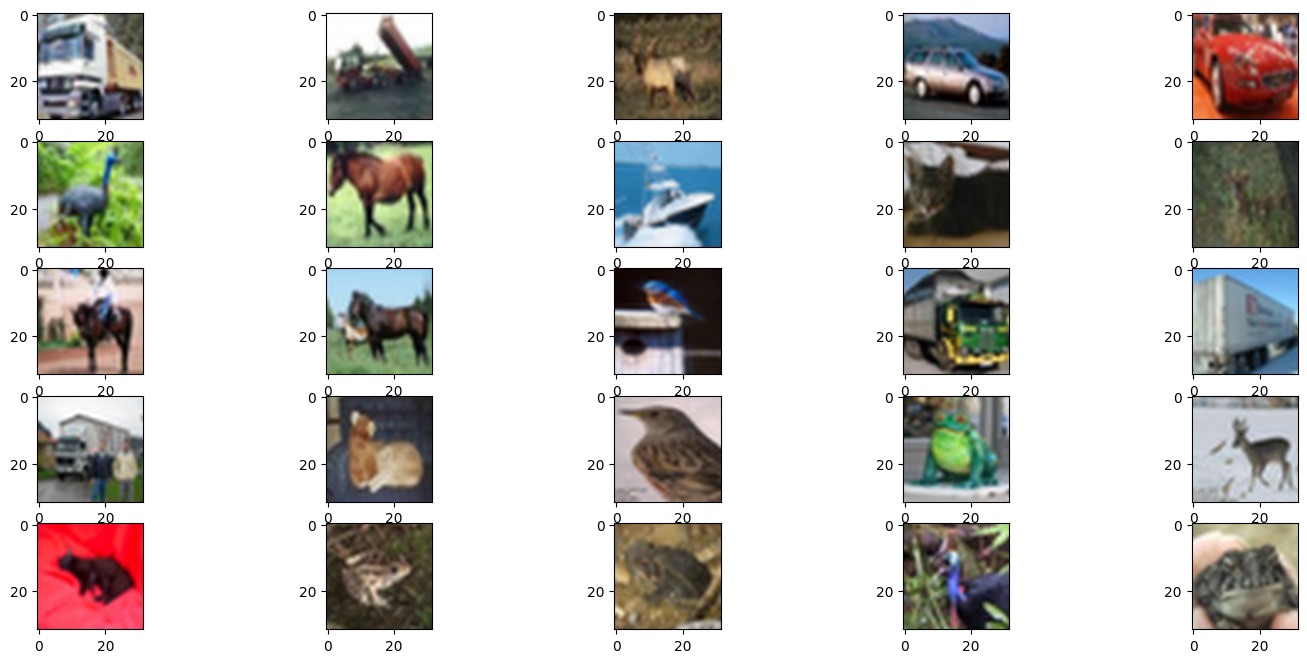

In [7]:
fig = plt.figure(figsize=(18, 8))
columns = 5
rows = 5
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train[i], interpolation='lanczos')

In [8]:
# mean = np.mean(x_train,axis=(0,1,2,3))
# std = np.std(x_train, axis=(0, 1, 2, 3))
# x_train = (x_train-mean)/(std+1e-7)
# x_test = (x_test-mean)/(std+1e-7)

In [9]:
from keras.utils import np_utils

In [10]:
y_train = keras.utils.np_utils.to_categorical(y_train, number_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, number_classes)

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

In [13]:
model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(wght_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(number_classes))
model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                        

In [15]:
image_augm = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=12,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

In [16]:
image_augm.fit(x_train)

In [17]:
# opt = optimizers.SGD(lr=learning_rate, decay=learning_decay, momentum=0.9, nesterov=True)
# opt = optimizers.sgd_experimental(lr=learning_rate, decay=learning_decay, momentum=0.9, nesterov=True)
# opt = optimizers.sgd_experimental.SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = optimizers.sgd_experimental.SGD(learning_rate=lr_schedule)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [19]:
import os as os
filepath=os.path.join('models','weights.best.hdf5')
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [20]:
callbacks_list = [checkpoint]

In [21]:
trained_model = model.fit_generator(image_augm.flow(x_train, y_train,
    batch_size=batch_size),
    steps_per_epoch=x_train.shape[0]//batch_size,
    epochs=maxepoches,
    validation_data=(x_test, y_test),callbacks=callbacks_list,verbose=1)

Epoch 1/30


C:\Users\jason\AppData\Local\Temp\ipykernel_44476\4119571034.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trained_model = model.fit_generator(image_augm.flow(x_train, y_train,


778/781 [============================>.] - ETA: 0s - loss: 2.7449 - accuracy: 0.2003
Epoch 1: val_accuracy improved from -inf to 0.31180, saving model to models\weights.best.hdf5
781/781 [==============================] - 16s 16ms/step - loss: 2.7441 - accuracy: 0.2002 - val_loss: 2.0296 - val_accuracy: 0.3118
Epoch 2/30
780/781 [============================>.] - ETA: 0s - loss: 2.1243 - accuracy: 0.2955
Epoch 2: val_accuracy improved from 0.31180 to 0.35650, saving model to models\weights.best.hdf5
781/781 [==============================] - 12s 16ms/step - loss: 2.1241 - accuracy: 0.2956 - val_loss: 1.9100 - val_accuracy: 0.3565
Epoch 3/30
778/781 [============================>.] - ETA: 0s - loss: 1.9281 - accuracy: 0.3552
Epoch 3: val_accuracy improved from 0.35650 to 0.42020, saving model to models\weights.best.hdf5
781/781 [==============================] - 12s 15ms/step - loss: 1.9282 - accuracy: 0.3550 - val_loss: 1.7510 - val_accuracy: 0.4202
Epoch 4/30
781/781 [================

Text(0, 0.5, 'acc')

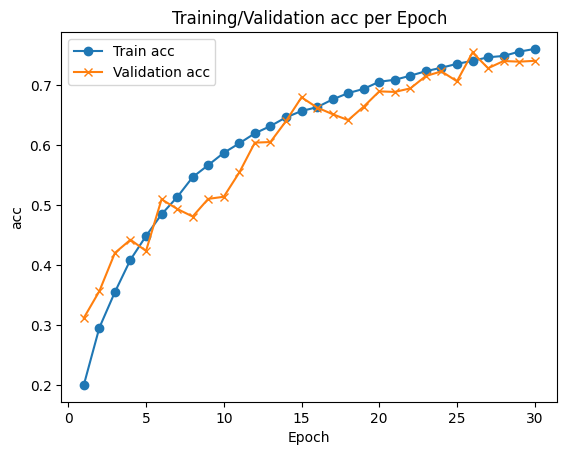

In [23]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + trained_model.history['accuracy'], 'o-')
ax.plot([None] + trained_model.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'acc')

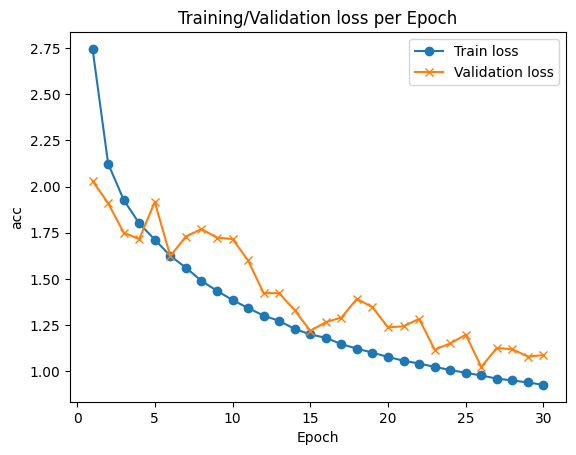

In [24]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + trained_model.history['loss'], 'o-')
ax.plot([None] + trained_model.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc = 0)
ax.set_title('Training/Validation loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

In [26]:
predictions = trained_model.model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [29]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

8

In [30]:
cm = confusion_matrix(rounded_labels, np.argmax(predictions,axis=1))

In [31]:
cm

array([[754,  12,  36,   3,  37,   0,  40,  17,  74,  27],
       [  4, 867,   0,   0,   0,   1,  50,   3,  19,  56],
       [ 55,   0, 495,  26,  88,  24, 262,  34,  13,   3],
       [  8,   2,  20, 508,  47,  53, 305,  36,   7,  14],
       [  3,   0,  10,  14, 711,   1, 223,  31,   7,   0],
       [  4,   0,  11, 168,  70, 511, 163,  68,   1,   4],
       [  3,   0,   2,   5,   3,   0, 982,   4,   1,   0],
       [  3,   0,   6,  21,  70,   4,  74, 816,   2,   4],
       [ 42,  14,   3,   8,   4,   0,  26,   3, 885,  15],
       [ 22,  25,   0,   2,   3,   0,  49,   5,  21, 873]], dtype=int64)

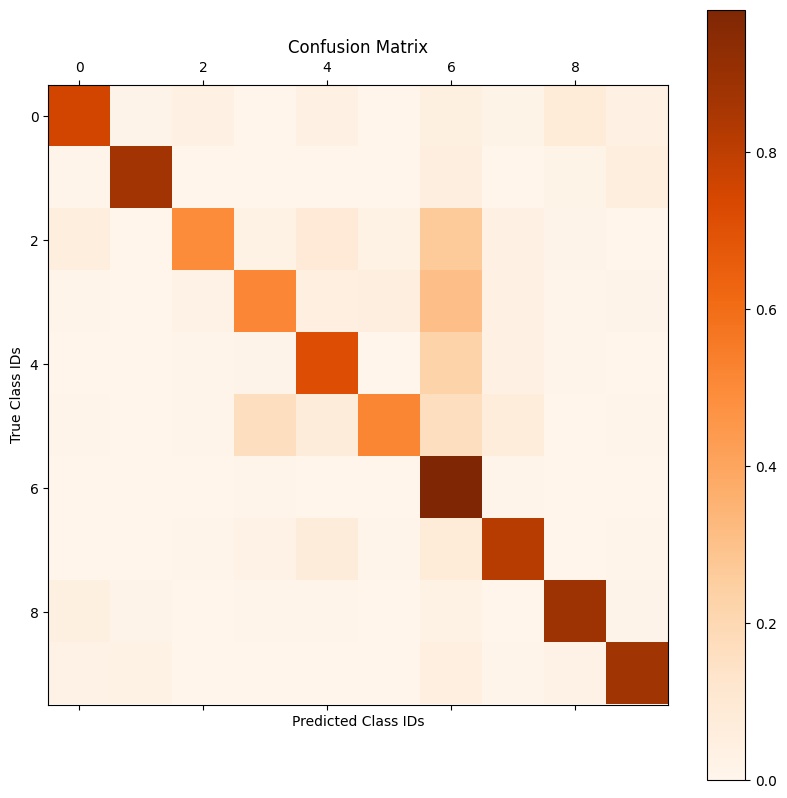

In [32]:
def plot_confusion_matrix(cm):
    cm = [row/sum(row)   for row in cm]
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.Oranges)
    fig.colorbar(cax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class IDs')
    plt.ylabel('True Class IDs')
    plt.show()
plot_confusion_matrix(cm)